C:\Users\lenovo\AppData\Local\Temp\ipykernel_6400\3254122222.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6400\3254122222.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)


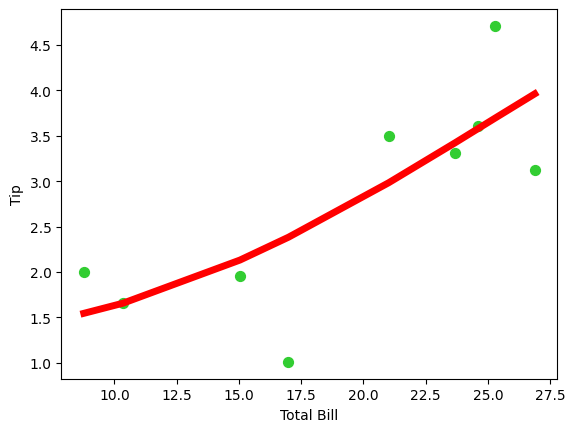

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.asmatrix(np.eye((m)))
    for j in range(m):
        diff = point - xmat[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    return weights    

def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    W = (xmat.T * (wei * xmat)).I * (xmat.T * (wei * ymat.T))
    return W

def localWeightRegression(xmat, ymat, k):
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
    return ypred
    
def graphPlot(X, ypred):
    sortindex = X[:, 1].argsort(0)
    xsort = X[sortindex][:, 0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # Adjusting the size of the green points using 's' and setting a brighter shade of green
    ax.scatter(bill, tip, color="limegreen", s=50)
    
    # Plotting the regression line
    ax.plot(xsort[:, 1], ypred[sortindex], color="red", linewidth=5)
    
    plt.xlabel("Total Bill")
    plt.ylabel("Tip")
    plt.show()

# Reading the CSV file
data = pd.read_csv(r"C:\Users\lenovo\Downloads\Bill and Tip.csv")

# Reading only the bill and tip data
bill = np.array(data.total_bill)
tip = np.array(data.tip)

mbill = np.asmatrix(bill)  # .mat converts nd array into 2d array
mtip = np.asmatrix(tip)
m = np.shape(mbill)[1]
one = np.asmatrix(np.ones(m))
X = np.hstack((one.T, mbill.T))  # 244 rows, 2 cols

# Perform local weight regression
ypred = localWeightRegression(X, mtip, 8)

# Plot the graph
graphPlot(X, ypred)
